# Predicting employee turnover

## Miguel Ángel Canela, IESE Business School

******


###  Introduction

**Employee turnover** in a company can come through normal means, such as retirement and resignation. The cause can be either voluntary or involuntary. Each industry has its own standards for acceptable turnover rates, and these rates can also differ between skilled and unskilled positions. However, there is more to employee turnover than a shrinking workforce. As employees leave an organization, they take with them skills which they developed during their tenure. Due to the expenses associated with training new employees, any type of employee attrition is typically seen to have a monetary cost.

The data of this example have been collected by a Healthcare company to learn what factors lead to employee turnover. The data set contains information about 1,470 employees. The variables are:

* `Turnover`, taking values 'No' and 'Yes'.

* `Age`, the employee's age, in years.

* `BusinessTravel`, taking values 'Non-Travel', 'Travel_Frequently' and 'Travel_Rarely.

* `Department`, taking values 'Human Resources', 'Research & Development' and 'Sales'.

* `Education`, education level, taking values 1 (Below College), 2 (College), 3 (Bachelor), 4 (Master) and 5 (Doctor).

* `EnvironmentSatisfaction`, satisfaction with work environment, taking values 1 (Low), 2 (Medium), 3 (High) and 4 (Very High).

* `Gender`, taking values 'Female' and 'Male'.

* `JobInvolvement`, the degree to which the employee is involved in his/her job, taking values 1 (Low), 2 (Medium), 3 (High) and 4 (Very High).

* `JobRole`, the job role, taking values 'Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive' and 'Sales Representative'.

* `JobSatisfaction`, the employee's satisfaction with his/her job, taking values 1 (Low), 2 (Medium), 3 (High) and 4 (Very High).

* `MaritalStatus`, the employee's marital status, taking values 'Divorced', 'Married' and 'Single'.

* `Wages`, the employee's monthly gross wages in US dollars.

* `CompaniesWorked`, the number of companies for which the employee has previously worked.

* `OverTime`, whether the employee works overtime, taking values 'No' and 'Yes'.

* `SalaryHike`, the percentage change in salary from 2016 vs 2015.

* `PerfoRating`, the employee's performance, taking values 1 (Low), 2 (Good), 3 (Excellent) and 4 (Outstanding). It is reported by the employee's manager.

* `StockOption`, whether the employee owns company stock, taking values 'No' and 'Yes'.

* `TotalWorkingYears`, the total number of years the employee has worked, across companies.

* `TrainingLastYear`, the number of training activities in which the employee has participated during the last year.

* `YearsAtCompany`, the number of years the employee has been working for the company.

* `YearsInCurrentRole`, the number of years the employee has worked in his/her actual role.

* `YearsSinceLastPromotion`, the number of years since the employee's last promotion.

* `YearsWithCurrManager`, the number of years the employee has been working with his/her current manager.

### Importing the data

To import the data from the CSV file, I have to load first the Pandas library, which I call, as usual, `pd`. Then, the function `read_csv` imports the data to a data frame. In this case, the file is in a remote location (a GitHub repository). Note that I have broken the specification of the data source in two lines. This can be done in several ways, but the safest one is to use the backslash ('\\'), which in Python works as a **line continuation character**.

In [1]:
import pandas as pd
fname = 'https://raw.githubusercontent.com/mcanela-iese/ML_Course/master/Data/' \
    'turnover.csv'
df = pd.read_csv(fname)

I perform some checks on the data frame, starting with the attribute `shape`, which contains the dimensions of the data frame.

In [2]:
df.shape

(1470, 23)

What the functions `head` and `tail` do is obvious. They admit an argument to control the number of rows returned, whose default is 5. So we can print the first 10 rows of our data set as follows. Keep in mind that functions with arguments must be written with parentheses. Leaving the parenthesis empty means that we accept the defaults.

In [3]:
df.head(10)

,Turnover,Age,BusinessTravel,Department,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,...,OverTime,SalaryHike,PerfoRating,StockOption,TotalWorkingYears,TrainingLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,2,2,Female,3,Sales Executive,4,...,Yes,11,3,No,8,0,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,1,3,Male,2,Research Scientist,2,...,No,23,4,Yes,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,4,Male,2,Laboratory Technician,3,...,Yes,15,3,No,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,4,4,Female,3,Research Scientist,3,...,Yes,11,3,No,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,1,1,Male,3,Laboratory Technician,2,...,No,12,3,Yes,6,3,2,2,2,2
5,No,32,Travel_Frequently,Research & Development,2,4,Male,3,Laboratory Technician,4,...,No,13,3,No,8,2,7,7,3,6
6,No,59,Travel_Rarely,Research & Development,3,3,Female,4,Laboratory Technician,1,...,Yes,20,4,Yes,12,3,1,0,0,0
7,No,30,Travel_Rarely,Research & Development,1,4,Male,3,Laboratory Technician,3,...,No,22,4,Yes,1,2,1,0,0,0
8,No,38,Travel_Frequently,Research & Development,3,4,Male,2,Manufacturing Director,3,...,No,21,4,No,10,2,9,7,1,8
9,No,36,Travel_Rarely,Research & Development,3,3,Male,3,Healthcare Representative,3,...,No,13,3,Yes,17,3,7,7,7,7


The content of a data frame can be explored with the function `info`, which returns a report containing the dimensions of the data frame and the data type of every column. Note that the numeric variables have been imported with type integer (more specifically, int64), because they do not come with decimals, while the non-numeric variables have been imported with type string ('object').

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
Turnover                   1470 non-null object
Age                        1470 non-null int64
BusinessTravel             1470 non-null object
Department                 1470 non-null object
Education                  1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
Gender                     1470 non-null object
JobInvolvement             1470 non-null int64
JobRole                    1470 non-null object
JobSatisfaction            1470 non-null int64
MaritalStatus              1470 non-null object
Wages                      1470 non-null int64
CompaniesWorked            1470 non-null int64
OverTime                   1470 non-null object
SalaryHike                 1470 non-null int64
PerfoRating                1470 non-null int64
StockOption                1470 non-null object
TotalWorkingYears          1470 non-null int64
TrainingLastYear           1470 non-nul

### Summarizing numeric variables

The function `describe` returns a conventional **statistical summary** of the numeric variables, ignoring the rest. To get a cleaner view, I have applied the function `round` whose argument (within the parenthesis) is the number of decimals. Note the syntax used for these functions, which usual in Pandas. The data frame `df` is not specified as an argument of the function `describe`, but this function is written as if it were an attribute of `df`. The same for `round`, although in plain Python there is a function `round` which has the same syntax as in Excel (try `round(5.67, 1)` to see this.

In [5]:
df.describe().round(1)

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,Wages,CompaniesWorked,SalaryHike,PerfoRating,TotalWorkingYears,TrainingLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,2.9,2.7,2.7,2.7,6502.9,2.7,15.2,3.2,11.3,2.8,7.0,4.2,2.2,4.1
std,9.1,1.0,1.1,0.7,1.1,4708.0,2.5,3.7,0.4,7.8,1.3,6.1,3.6,3.2,3.6
min,18.0,1.0,1.0,1.0,1.0,1009.0,0.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,30.0,2.0,2.0,2.0,2.0,2911.0,1.0,12.0,3.0,6.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,3.0,3.0,3.0,3.0,4919.0,2.0,14.0,3.0,10.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,4.0,4.0,3.0,4.0,8379.0,4.0,18.0,3.0,15.0,3.0,9.0,7.0,3.0,7.0
max,60.0,5.0,4.0,4.0,4.0,19999.0,9.0,25.0,4.0,40.0,6.0,40.0,18.0,15.0,17.0


### Summarizing categorical variables

For any of the categorical variables with data type string, the function `value_counts()` returns a table (more specifically, a Pandas series) containing counts of unique values. Note that `df['Department']` is a series and `value_counts` is a function which takes this series as an argument.

In [6]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [7]:
pd.crosstab(df['Department'], df['BusinessTravel'])

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Department,,,
Human Resources,6,11,46
Research & Development,97,182,682
Sales,47,84,315


### Pivot tables

**Pivot tables** are created in Pandas with the function `pivot_table`, which also returns a data frame. The basic arguments of this function are: the data frame (`data`), the grouping variables (`index` and `columns`), the variable aggregated (`values`) and the aggregation function (`aggfunc`). In a **two-way table** (see the second example), `index` specifies the rows and `columns` specifies the columns. In a **one-way table**, we only need one of these two arguments.

In [8]:
tab1 = pd.pivot_table(data=df, index='Education', values='Wages', aggfunc='mean')
tab1.round(1)

,Wages
Education,
1,5640.6
2,6226.6
3,6517.3
4,6832.4
5,8277.6


Some people prefer a graphical version of one-way tables. For the pivot table tab1, the natural visualization would be a bar plot, which can be produced with the function plot.bar, as you can see below. First, we load the module `pyplot` of the library Matplotlib. In Pandas, we can exctract the plots as attributes. The graphical parameters (in this case, `figsize` and `color`) are now specified as arguments of `plot.bar`. The figure size is easy to manage, but color can be specified in many ways in Matplotlib. If you are interested, take a look at the manual, or at `matplotlib.org`.

*Note*. I use here `plt.show` to get code that can be run anywhere. It is not needed in a Jupyter notebook.

In [9]:
import matplotlib.pyplot as plt

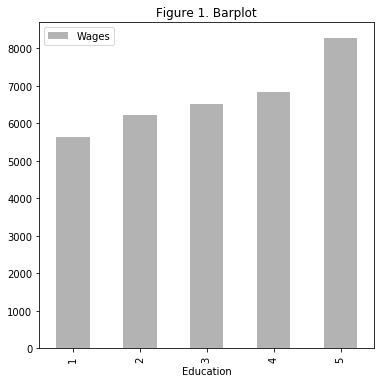

In [10]:
tab1.plot.bar(title='Figure 1. Barplot', figsize=(6,6), color='0.7')
plt.show()

Now, a two-way pivot table, with both arguments `index` and `columns`. The same result can be obtained adding arguments `values` and `aggfunc` in the function `crosstab`.

In [11]:
tab2 = pd.pivot_table(data=df, index='Education', columns='Department', 
    values='Wages', aggfunc='mean')
tab2.round(1)

Department,Human Resources,Research & Development,Sales
Education,,,
1,2776.6,5770.9,5627.3
2,4782.9,6190.1,6518.8
3,6760.6,6220.7,7154.8
4,9711.1,6426.0,7304.7
5,4990.3,8325.6,8839.2


### Correlation

**Correlation matrices** are produced in Pandas with the function `corr`, which returns a data frame. Note the way in which the functions are applied one after the other.

In [12]:
df[['Age', 'JobSatisfaction', 'Wages', 'PerfoRating']].corr().round(2)

,Age,JobSatisfaction,Wages,PerfoRating
Age,1.0,-0.00,0.50,0.00
JobSatisfaction,-0.0,1.00,-0.01,0.00
Wages,0.5,-0.01,1.00,-0.02
PerfoRating,0.0,0.00,-0.02,1.00


### Plotting

The **histogram** allows a quick glance at the distribution of a numeric variable. Histograms can also be obtained as attributes of a series, with the same syntax as the bar plot. The `xlabel` parameter has to be specified separately, because `plot.hist` does not admit this parameter.

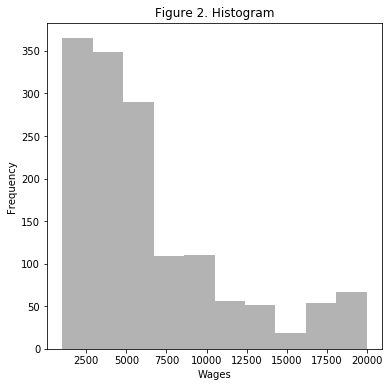

In [13]:
df['Wages'].plot.hist(title='Figure 2. Histogram', figsize=(6,6), color='0.7')
plt.xlabel('Wages')
plt.show()

**Scatter plots** are obtained with the function `plot.scatter`, in a similar way. The parameter `s` controls the size of the dots, which has to be decided taking into account the number of dots. The value of this parameter is the square of the marker size in points. Note that, here, the axes are labeled automatically with the names of the `x` and `y` variables.

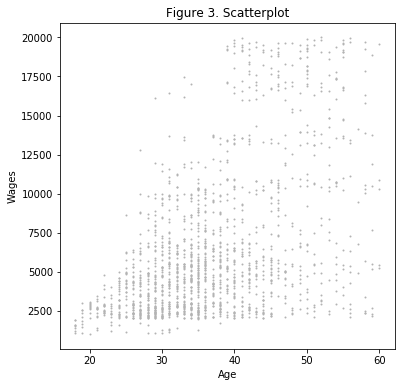

In [14]:
df.plot.scatter(x='Age', y='Wages', title='Figure 3. Scatterplot', figsize=(6,6), color='0.7', s=1)
plt.show()